In [1]:
import pandas as pd

In [209]:
# 데이터 불러오기
data = pd.read_csv("/Users/sehwaryu/Documents/OneDrive/DataSci/파이썬 스터디/coronavirusdataset_20200420/Time.csv", encoding = "cp949")
data

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0
...,...,...,...,...,...,...,...
87,2020-04-16,0,538775,513894,10613,7757,229
88,2020-04-17,0,546463,521642,10635,7829,230
89,2020-04-18,0,554834,530631,10653,7937,232
90,2020-04-19,0,559109,536205,10661,8042,234


In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
date         92 non-null object
time         92 non-null int64
test         92 non-null int64
negative     92 non-null int64
confirmed    92 non-null int64
released     92 non-null int64
deceased     92 non-null int64
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


In [211]:
# Index를 날짜로 셋
data = data.set_index('date')

In [212]:
# 확진율 계산
def positive_perc(test, confirmed):
    perc = confirmed / test
    perc = perc * 100
    return perc

In [213]:
# 치명율 계산
def death_perc(confirmed, deceased):
    perc = deceased / confirmed
    perc = perc * 100
    return perc

In [214]:
# 확진율 칼럼 추가
data['positive_perc'] = data.apply(lambda x: positive_perc(x.test, x.confirmed), axis=1)

In [215]:
# 치명률 칼럼 추가
data['death_perc'] = data.apply(lambda x: death_perc(x.confirmed, x.deceased), axis=1)
data

,time,test,negative,confirmed,released,deceased,positive_perc,death_perc
date,,,,,,,,
2020-01-20,16,1,0,1,0,0,100.000000,0.000000
2020-01-21,16,1,0,1,0,0,100.000000,0.000000
2020-01-22,16,4,3,1,0,0,25.000000,0.000000
2020-01-23,16,22,21,1,0,0,4.545455,0.000000
2020-01-24,16,27,25,2,0,0,7.407407,0.000000
...,...,...,...,...,...,...,...,...
2020-04-16,0,538775,513894,10613,7757,229,1.969839,2.157731
2020-04-17,0,546463,521642,10635,7829,230,1.946152,2.162670
2020-04-18,0,554834,530631,10653,7937,232,1.920034,2.177790


In [223]:
# 중요하지 않은 1월 데이터 드랍
data = data.drop(data.index[0])
data

,time,test,negative,confirmed,released,deceased,positive_perc,death_perc
date,,,,,,,,
2020-01-28,16,116,97,4,0,0,3.448276,0.000000
2020-01-29,16,187,155,4,0,0,2.139037,0.000000
2020-01-30,16,246,199,6,0,0,2.439024,0.000000
2020-01-31,16,312,245,11,0,0,3.525641,0.000000
2020-02-01,16,371,289,12,0,0,3.234501,0.000000
...,...,...,...,...,...,...,...,...
2020-04-16,0,538775,513894,10613,7757,229,1.969839,2.157731
2020-04-17,0,546463,521642,10635,7829,230,1.946152,2.162670
2020-04-18,0,554834,530631,10653,7937,232,1.920034,2.177790


In [224]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [225]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

Text(0, 0.5, '검사 건 수')

<Figure size 432x288 with 0 Axes>

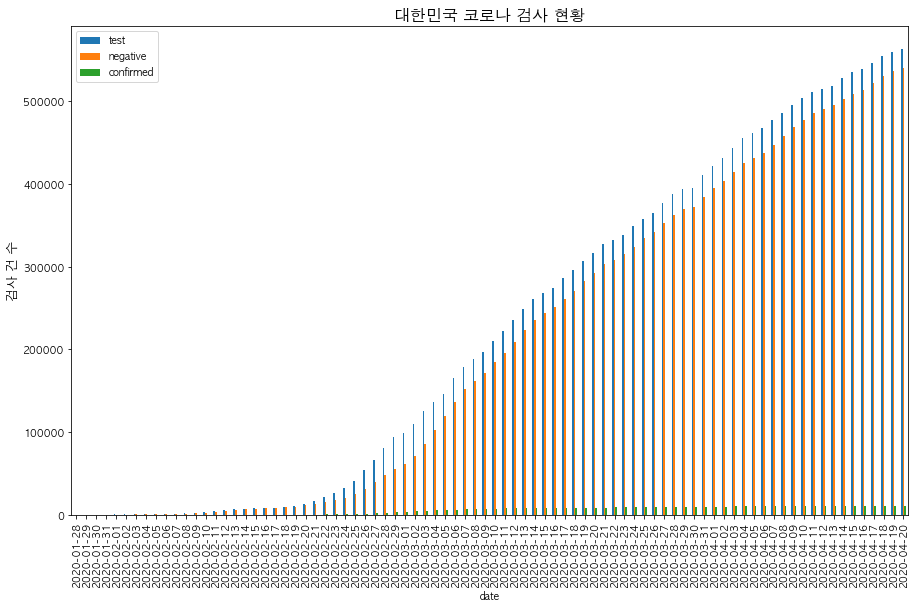

In [235]:
plt.figure()
ax = data[['test','negative', 'confirmed']].plot(kind='bar', use_index=True, figsize = (15,9))
#ax2 = ax.twinx()
#ax2.plot(data['percentage'].values, linestyle='-', linewidth=1.0, color = 'red')
ax.set_title('대한민국 코로나 검사 현황', fontsize=16)
ax.set_ylabel('검사 건 수', fontsize=13)


Text(0, 0.5, '확진율, 치명율(%)')

<Figure size 432x288 with 0 Axes>

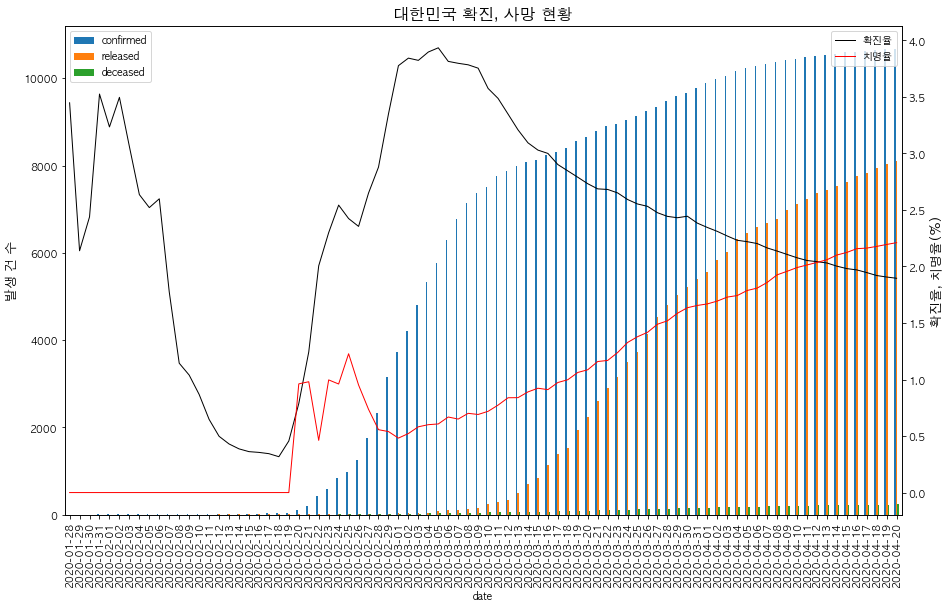

In [238]:
plt.figure()
ax = data[['confirmed','released', 'deceased']].plot(kind='bar', use_index=True, figsize = (15,9))
ax.set_ylabel('발생 건 수', fontsize=13)

ax2 = ax.twinx()
ax2.plot(data['positive_perc'].values, linestyle='-', linewidth=1.0, color = 'black', label= '확진율')
ax2.plot(data['death_perc'].values, linestyle='-', linewidth=1.0, color = 'red', label = '치명율')
ax2.legend()
ax2.set_title('대한민국 확진, 사망 현황', fontsize=16)
ax2.set_ylabel('확진율, 치명율(%)', fontsize=13)


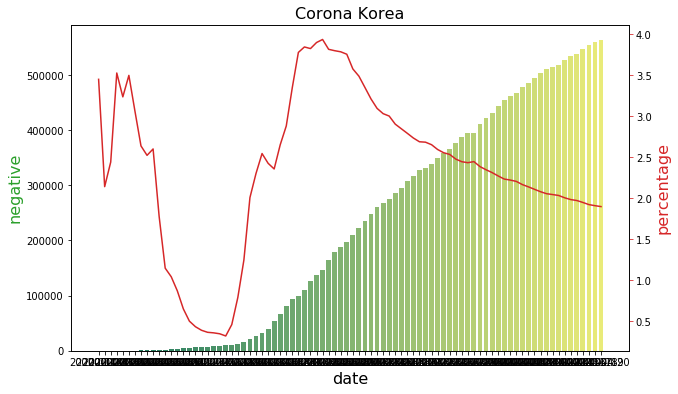

In [90]:
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
ax1.set_title('Corona Korea', fontsize=16)
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Cases', fontsize=16, color=color)
ax2 = sns.barplot(x='date', y='test', data = data, palette='summer')
ax2 = sns.barplot(x='date', y='negative', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Percentage(%)', fontsize=16, color=color)
ax2 = sns.lineplot(x='date', y='percentage', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

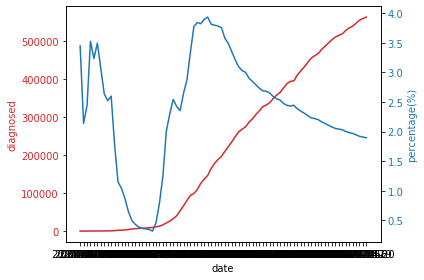

<Figure size 1440x1440 with 0 Axes>

In [94]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('date')
ax1.set_ylabel('diagnosed', color=color)
ax1.plot(data['date'], data['test'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('percentage(%)', color=color)  # we already handled the x-label with ax1
ax2.plot(data['date'], data['percentage'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.figure(figsize=(20,20))

plt.show()


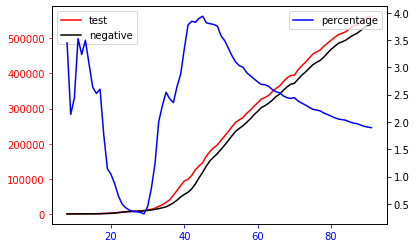

In [63]:
# First axis
fig, ax = plt.subplots()
plt.plot(data['test'], 'r', label='test')
plt.plot(data['negative'], 'k', label='negative')
plt.legend()
ax.tick_params('y', colors='r')

# Get second axis
ax2 = ax.twinx()
plt.plot(data['percentage'], 'b', label='percentage')
plt.legend()
ax.tick_params('x', colors='b')

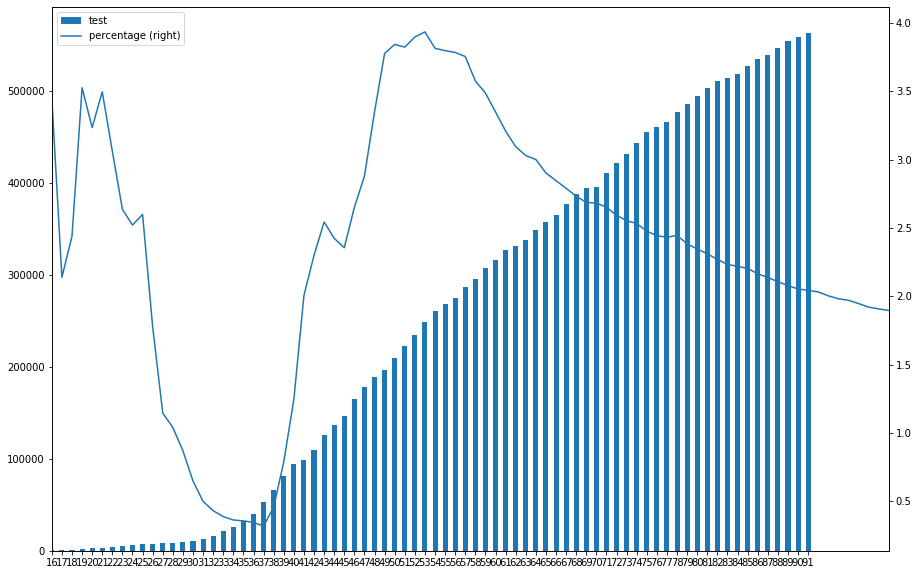

In [98]:
data.test.plot(label="test", legend=True, kind = 'bar', figsize = (15,10))
data.percentage.plot(secondary_y=True, label="percentage", legend=True)

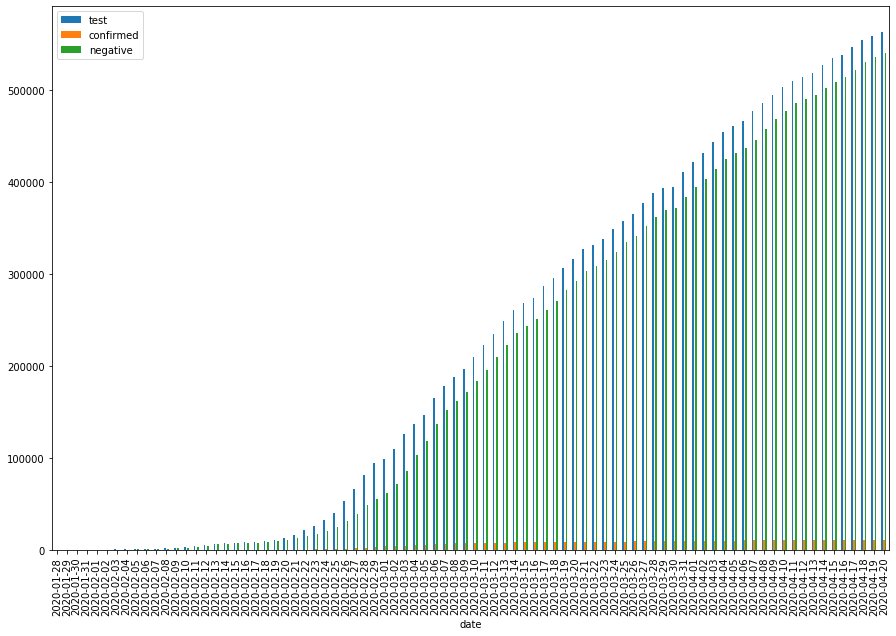

In [43]:
# Test, negative
data.plot(x = 'date', y = ['test','confirmed','negative'], kind = 'bar', figsize=(15,10))

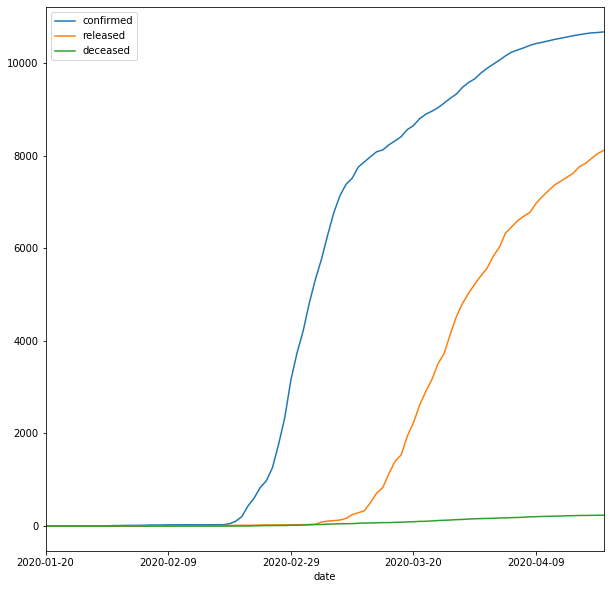

In [10]:
data.plot(x = 'date', y = ['confirmed', 'released', 'deceased'],figsize =(10,10))